In [28]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge

# Uploading the test and training data files on google colab.

In [3]:
uploaded_training = files.upload()

Saving training_features - Copy.csv to training_features - Copy.csv


In [4]:
uploaded_test = files.upload()

Saving test_features - Copy.csv to test_features - Copy.csv


In [5]:
# Loading the data using pandas.
training_data = pd.read_csv('training_features - Copy.csv')
test_data = pd.read_csv('test_features - Copy.csv')

# Separating predictor and target variables.

In [19]:
X_train = training_data.iloc[:, 4:].values
Y_train = training_data.iloc[:, 2].values
X_test = test_data.iloc[:, 4:].values
Y_test = test_data.iloc[:, 2].values

### Standardising Data

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Feature selection: Top 10 best performing features using Mutual Information feature selection

[(0.13862065160471904, 'OtherErrorsPerSen', 17), (0.10774662234542198, 'AllErrorsPerSen', 18), (0.09691080037863742, 'Word_RTTR', 11), (0.09319145189439393, 'Word_CTTR', 10), (0.0808258391555472, 'dw', 5), (0.07663171624051035, 'SYN_numPPsPerSen', 55), (0.0683240246832888, 'SpellingErrorsPerSen', 15), (0.05858691777246783, 'POS_numVerbsVBN', 38), (0.0554536826441554, 'Word_numWords', 8), (0.05431688953104041, 'SYN_numSentences', 49)]


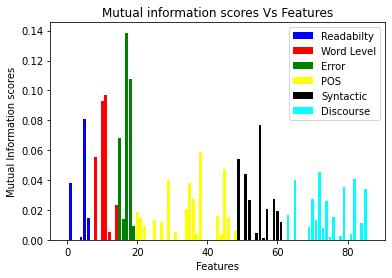

In [21]:
feature_name = training_data.iloc[:, 4:].columns
fs = SelectKBest(score_func=mutual_info_regression, k=10)
fs.fit(X_train, Y_train)
print( sorted( [(x,feature_name[i], i) for (i,x) in enumerate(fs.scores_)], reverse=True )[:10] )

# plot the scores
x = np.arange(len(fs.scores_))
y = fs.scores_

g1 = x <= 7
g2 = (8<=x)&(x<=14)
g4 = (20<=x)&(x<=48)
g3 = (15<=x)&(x<=19)
g5 = (49<=x)&(x<=62)
g6 = (63<=x)&(x<=88)

plt.ylabel('Mutual Information scores')
plt.xlabel('Features')
plt.title('Mutual information scores Vs Features')
plt.bar(x[g1], y[g1], color = 'blue', label='Readabilty')
plt.bar(x[g2], y[g2], color = 'red', label='Word Level')
plt.bar(x[g3], y[g3], color = 'green', label='Error')
plt.bar(x[g4], y[g4], color = 'yellow', label='POS')
plt.bar(x[g5], y[g5], color = 'black', label='Syntactic')
plt.bar(x[g6], y[g6], color = 'cyan', label='Discourse')
plt.legend()
plt.show()

# Modifying dataset to include only top 10 features

In [22]:
training_data.iloc[:, [17+4,18+4,11+4,10+4,5+4,55+4,15+4,38+4,8+4,49+4]].columns

Index(['OtherErrorsPerSen', 'AllErrorsPerSen', 'Word_RTTR', 'Word_CTTR', 'dw',
       'SYN_numPPsPerSen', 'SpellingErrorsPerSen', 'POS_numVerbsVBN',
       'Word_numWords', 'SYN_numSentences'],
      dtype='object')

In [23]:
X_train = training_data.iloc[:, [17+4,18+4,11+4,10+4,5+4,55+4,15+4,38+4,8+4,49+4]].values
X_test = test_data.iloc[:, [17+4,18+4,11+4,10+4,5+4,55+4,15+4,38+4,8+4,49+4]].values

### Principal Component Analysis (PCA)

In [24]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Ridge Regression

In [25]:
regressor = Ridge(alpha=0.11)
regressor.fit(X_train, Y_train) 

Ridge(alpha=0.11, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
y_pred = regressor.predict(X_train)
y_pred = np.rint(y_pred)
print('Training RMSE',np.sqrt(((y_pred.flatten() - Y_train) ** 2).mean()))
print('Training MAE', mean_absolute_error(Y_train, y_pred.flatten()))
corr, _ = pearsonr(y_pred.flatten(), Y_train)
print('Pearsons correlation: %.3f' % corr)

Training RMSE 4.273924771629646
Training MAE 3.3917616126205083
Pearsons correlation: 0.628


In [27]:
y_pred = regressor.predict(X_test)
y_pred = np.rint(y_pred)
print('Test RMSE',np.sqrt(((y_pred.flatten() - Y_test) ** 2).mean()))
print('Test MAE', mean_absolute_error(Y_test, y_pred.flatten()))
corr, _ = pearsonr(y_pred.flatten(), Y_test)
print('Pearsons correlation: %.3f' % corr)

Test RMSE 4.5509713475461
Test MAE 3.7010309278350517
Pearsons correlation: 0.646
